# Plotting

Python have a very rich plotting library ecosystem:

* **Matplotlib**: *low level* principal plotting library of python. [Tutorials](https://matplotlib.org/tutorials/index.html)
* **Pandas plotting tools**: handy wrappers around matplotlib objects. [Docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* **Seaborn**: Easy statistics plots (also a wrapper of matplotlib) [Gallery](https://seaborn.pydata.org/examples/index.html)


Since the last two libraries are build on matplotlib, they use the same objects and have similar arguments.
For example the color manager is the same:
* [Matplotlib Colormaps](https://matplotlib.org/examples/color/colormaps_reference.html)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Plotting with Pandas

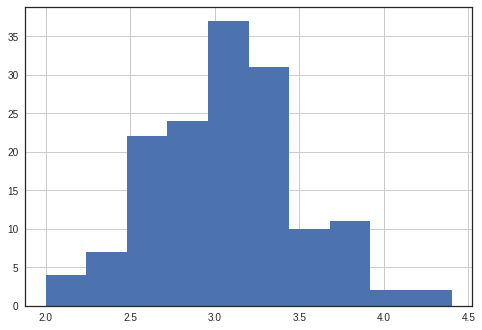

In [5]:
df['sepal_width'].hist()

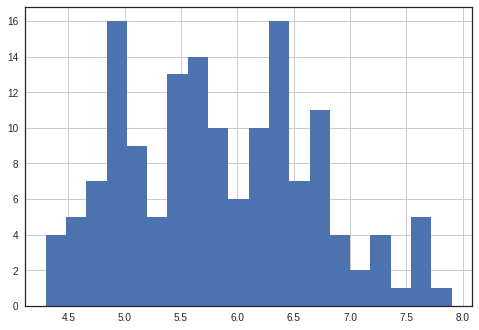

In [6]:
df.sepal_length.hist(bins=20)

Sometimes is not straightforward to find the formula for ploting options

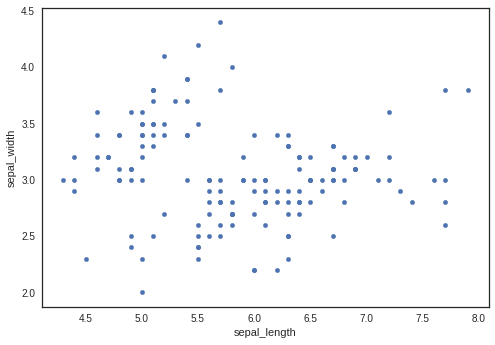

In [7]:
df.plot.scatter(x='sepal_length', y='sepal_width')

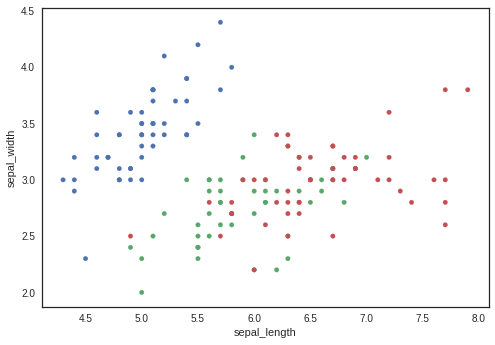

In [8]:
cols = {'setosa':'C0', 'versicolor':'C1', 'virginica':'C2'}
colors = df.species.map(cols)

df.plot.scatter(x='sepal_length', y='sepal_width', c=colors)

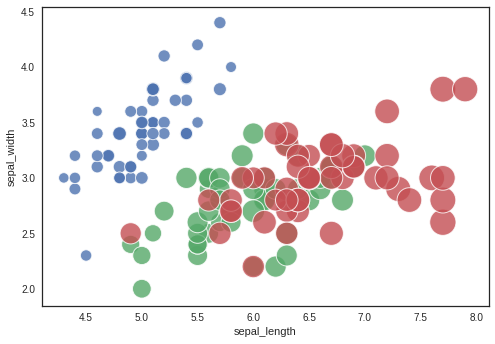

In [10]:
df.plot.scatter(x='sepal_length',
                y='sepal_width',
                c=colors,
                s=df.petal_length*100,
                linewidths=1,
                edgecolor='w',
                alpha=0.8)

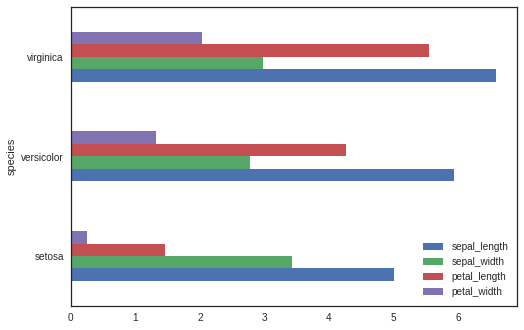

In [9]:
df.groupby(by='species').mean().plot.barh()

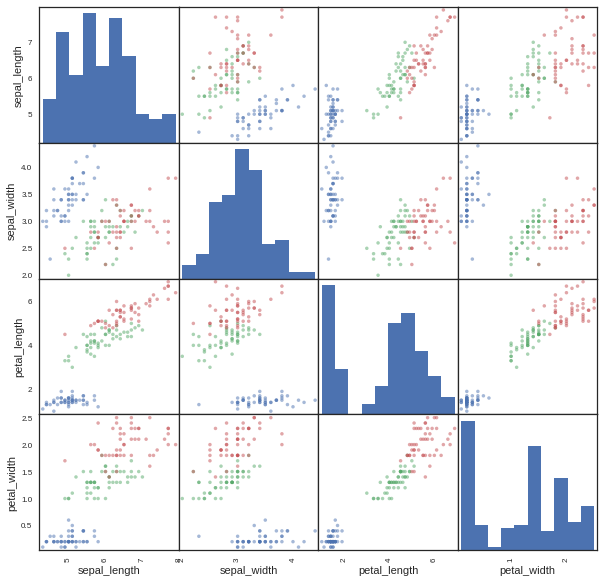

In [10]:
pd.plotting.scatter_matrix(df, figsize=(10,10), diagonal='hist', c=colors);

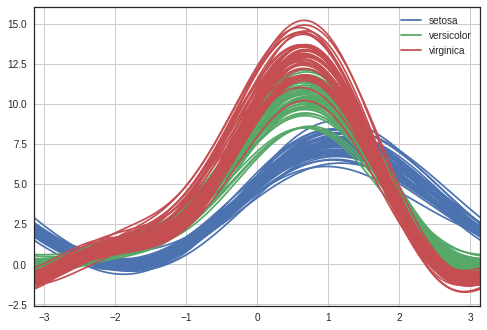

In [11]:
pd.plotting.andrews_curves(df, class_column='species', color=('C0','C1','C2'))

In [ ]:
pd.plotting.

## Plotting with seaborn

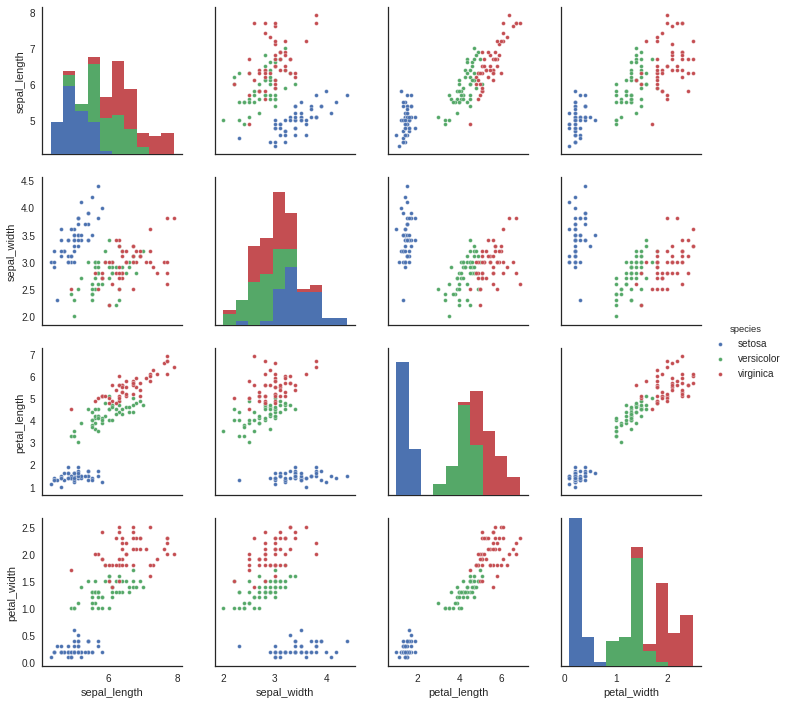

In [16]:
sns.pairplot(df, hue='species', diag_kind='hist', plot_kws=dict(s=15))

/home/biel/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


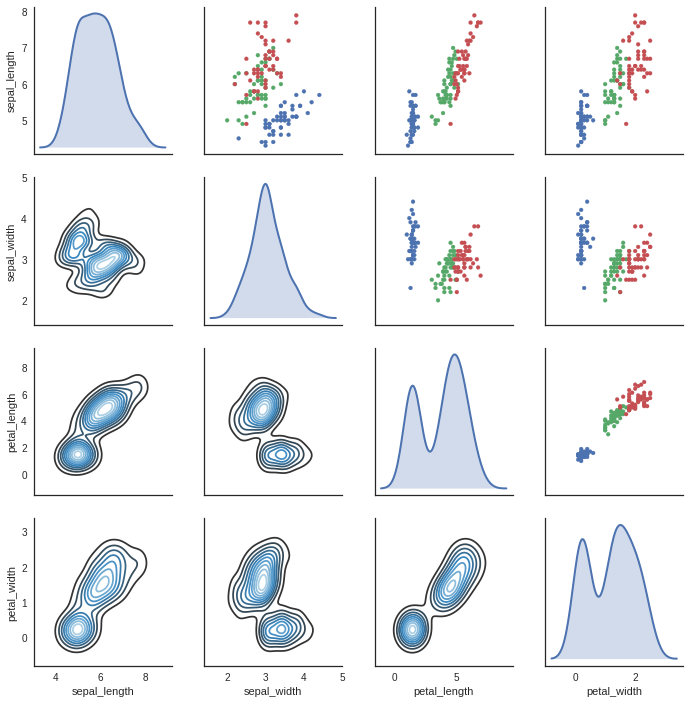

In [19]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter, color = colors, s = 15)
g.map_diag(sns.kdeplot, lw=2, shade=True)

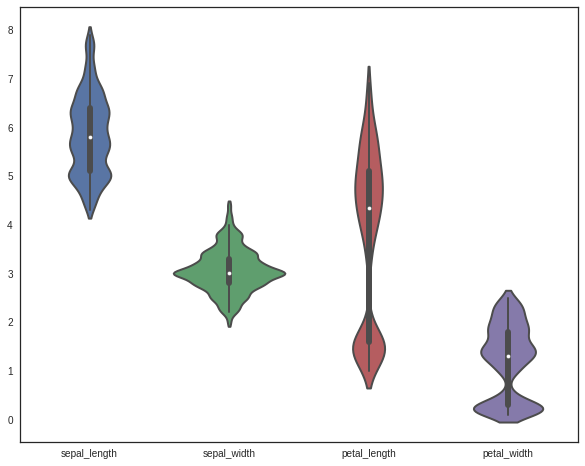

In [12]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, bw=.2, cut=1, linewidth=2)

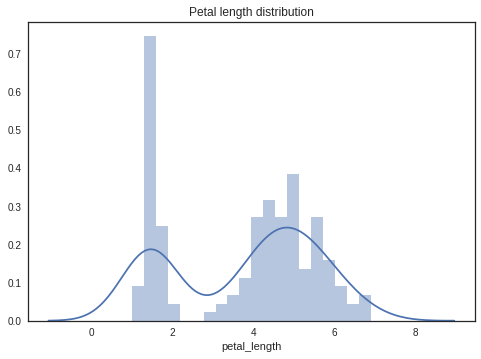

In [52]:
sns.distplot(df.petal_length, bins=20,)
plt.title('Petal length distribution')

In [45]:
iris_melt = pd.melt(df, "species", var_name="measurement")

In [46]:
iris_melt.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


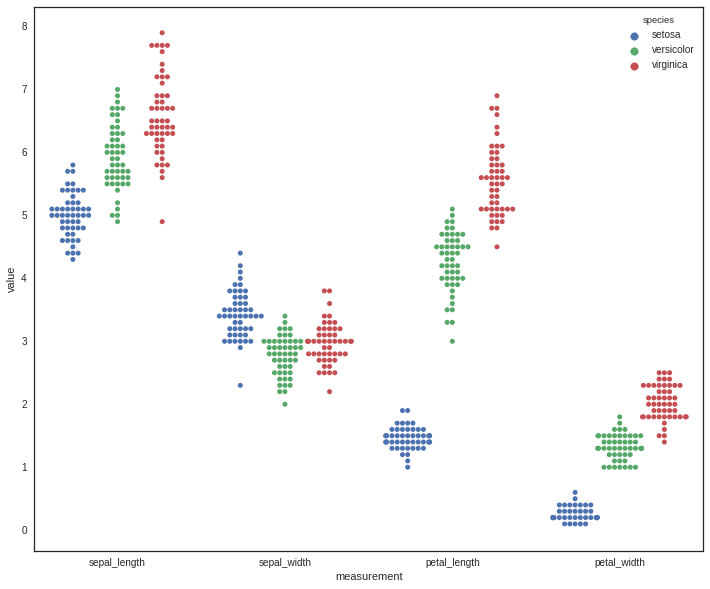

In [51]:
plt.figure(figsize=(12,10))
sns.swarmplot(x="measurement", y="value", hue="species", data=iris_melt, split=1, )